In [10]:

import argparse
from baselines.common.cmd_util import mujoco_arg_parser
from baselines import bench, logger
import gym

import sys
sys.path.append('/home/studio/Documents/aman/pictogram_agents/')

import starfish

from matplotlib import pyplot as plt

import tensorflow as tf
import tqdm
import numpy as np

from baselines.ppo2.policies import MlpPolicy
from baselines.ppo2 import ppo2


%matplotlib inline

In [11]:
swimx_env = gym.make('Starfish-SwimX-v0')
swimx_env.reset()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


array([ 0.07637158,  0.06184522,  0.06743523, -0.03454361, -0.01542201,
        0.04010462, -0.03803018, -0.02167391,  0.02429188, -0.03654102,
       -0.09573244, -0.0411275 ,  0.04920251,  0.00682006, -0.06462239,
       -0.02840664, -0.05048192, -0.09294725,  0.06062736, -0.03647493,
       -0.00488878, -0.04092061, -0.05685795,  0.01889914,  0.04502115,
        0.01921974,  0.08598464, -0.08656198,  0.05300573,  0.06677035])

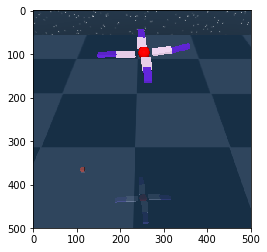

In [12]:
plt.imshow(swimx_env.sim.render(500, 500, camera_name='tracking_top', depth=False)[::-1, :, :])

In [13]:
swimx_env.observation_space, swimx_env.action_space

(Box(30,), Box(24,))

In [14]:
def init_model(observation_space, action_space, load_path,
               lam=0.95, gamma=0.99, noptepochs=10, 
               nsteps=2048, ent_coef=0.0, cliprange=0.2,
               vf_coef=0.5):
    model = ppo2.Model(policy=MlpPolicy, ob_space=observation_space,
                       ac_space=action_space, nbatch_act=1, nbatch_train=1,
                       nsteps=1, ent_coef=ent_coef, vf_coef=vf_coef, max_grad_norm=0.5)
    model.load(load_path)
    return model



In [14]:
total_timesteps = 1000

config = tf.ConfigProto()
config.gpu_options.allow_growth = True

tf.reset_default_graph()
with tf.Session(config=config).as_default():
    model = init_model(swimx_env.observation_space, 
                       swimx_env.action_space, 
                       './starfish_logs/checkpoints/00800')
    
    obs = swimx_env.reset()
    obs = obs[np.newaxis, :]
    state = model.initial_state
    timestep = 0
    done = False
    frames = []
    for timestep in tqdm.tqdm(range(total_timesteps)):
        if done:
            break
        act, _, state, _ = model.step(obs, state, done)
        obs, reward, done, info = swimx_env.step(act)
        obs = obs[np.newaxis, :]
        timestep += 1
        frame = swimx_env.sim.render(500, 500, camera_name='tracking_top', depth=False)[::-1, :, :]
        frames.append(frame)
        

Box(30,) Box(24,) 1



  1%|          | 7/1000 [00:00<01:29, 11.12it/s]


In [16]:
from matplotlib import animation
from IPython.display import HTML

def frames_2_anim(frames):
    fig = plt.figure()
    ax = plt.axes()
    line = ax.imshow(frames[0])

    def init():
        line.set_data(frames[0])
        return line,

    def animate(i):
        line.set_data(frames[i])
        return line,

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(frames), interval=1000 * (1/24))

    return HTML(anim.to_html5_video())

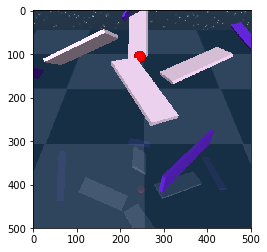

In [16]:
frames_2_anim(frames)

Box(30,) Box(24,) 1



100%|██████████| 1000/1000 [01:20<00:00, 12.40it/s]


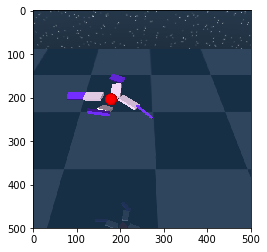

In [14]:
swimx_env.frame_skip = 2
swimx_env.model.opt.timestep = 0.01
swimx_env.reset()
swimx_env.model.body_pos[swimx_env.model.body_pos == swimx_env.get_body_com('target')] = 10.0
tf.reset_default_graph()
with tf.Session(config=config).as_default():
    model = init_model(swimx_env.observation_space, 
                       swimx_env.action_space, 
                       './starfish_logs/checkpoints/00800')
    
    obs = swimx_env.reset()
    obs = obs[np.newaxis, :]
    state = model.initial_state
    timestep = 0
    done = False
    frames = []
    for timestep in tqdm.tqdm(range(1000)):
        if done:
            break
        act, _, state, _ = model.step(obs, state, done)
        obs, reward, done, info = swimx_env.step(act)
        obs = obs[np.newaxis, :]
        timestep += 1
        frame = swimx_env.sim.render(500, 500, camera_name='tracking_top', depth=False)[::-1, :, :]
        frames.append(frame)

frames_2_anim(frames)

In [15]:
findtarget_env = gym.make('Starfish-FindTarget-v0')
findtarget_env.reset()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


array([ 5.30058957e-01,  2.62589998e-01,  9.34960827e-01, -5.02561822e-01,
       -3.02526415e-01,  9.88979627e-03, -2.20979460e-02, -3.79772285e-02,
       -2.10523341e-02,  6.56182009e-02, -5.92239056e-02,  7.74482079e-02,
       -3.14093459e-02,  5.77250921e-02, -7.52271137e-02,  3.48596905e-02,
       -9.93972118e-02, -1.03761446e-02, -8.24606573e-02, -6.73022900e-03,
        8.11508643e-02, -9.81041403e-02, -8.84371688e-02, -7.76635924e-02,
        1.66488555e-02, -7.54463387e-02,  6.66265660e-02, -7.10822432e-02,
       -7.23184781e-02,  3.69936887e-02,  5.00327391e-02,  1.61788152e-03,
       -7.52273252e-02, -6.54986685e-02,  7.31815064e-02,  9.35966846e-02,
       -1.37499100e-02,  4.69781762e-02, -9.19914462e-01, -5.22928212e-04,
       -2.12470703e-05, -2.15682442e-04, -6.38325610e-02, -2.72653768e-03,
        7.11499862e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        6.42108277e-02,  2.94121995e-03, -9.85844870e-04,  0.00000000e+00,
        0.00000000e+00,  

In [9]:
findtarget_env.reset()

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.allow_soft_placement = True
tf.reset_default_graph()
with tf.Session(config=config).as_default():
    with tf.device('/gpu:0'):
        model = init_model(findtarget_env.observation_space, 
                           findtarget_env.action_space, 
                           './starfish_findtarget_moreinfo_logs/checkpoints/00200')
    
    obs = findtarget_env.reset()
    obs = obs[np.newaxis, :]
    state = model.initial_state
    timestep = 0
    done = False
    frames = []
    rewards = []
    for timestep in tqdm.tqdm(range(1000)):
        if done:
            break
        act, _, state, _ = model.step(obs, state, done)
        obs, reward, done, info = findtarget_env.step(act)
        rewards.append(reward)
        obs = obs[np.newaxis, :]
        timestep += 1
        frame = findtarget_env.sim.render(500, 500, camera_name='tracking_top', depth=False)[::-1, :, :]
        frames.append(frame)

plt.plot(rewards)
plt.show()
frames_2_anim(frames)

NameError: name 'findtarget_env' is not defined

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


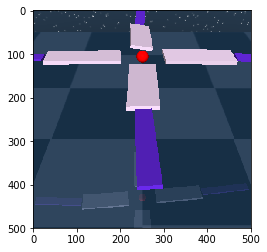

In [33]:
swimx_large_env = gym.make('Starfish-SwimXLarge-v0')
swimx_large_env.reset()
plt.imshow(swimx_large_env.sim.render(500, 500, camera_name='tracking_top', depth=False)[::-1, :, :])

Box(30,) Box(24,) 1


100%|██████████| 300/300 [00:22<00:00, 13.41it/s]


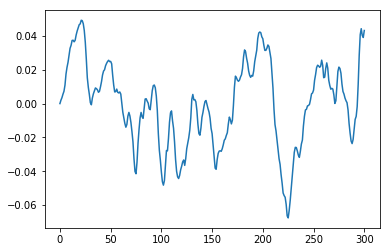

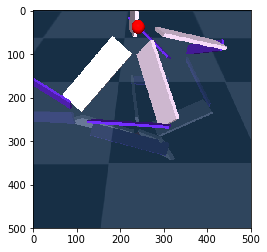

In [49]:
swimx_large_env.reset()

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.allow_soft_placement = True
tf.reset_default_graph()
with tf.Session(config=config).as_default():
    with tf.device('/gpu:0'):
        model = init_model(swimx_large_env.observation_space, 
                           swimx_large_env.action_space, 
                           './starfish_large_logs/checkpoints/00360')
    
    obs = swimx_large_env.reset()
    obs = obs[np.newaxis, :]
    state = model.initial_state
    timestep = 0
    done = False
    frames = []
    rewards = [0.0]
    for timestep in tqdm.tqdm(range(300)):
        if done:
            pass
        act, _, state, _ = model.step(obs, state, done)
        obs, reward, done, info = swimx_large_env.step(act)
        rewards.append(rewards[-1] * 0.9 + reward * 0.1)
        obs = obs[np.newaxis, :]
        timestep += 1
        frame = swimx_large_env.sim.render(500, 500, camera_name='tracking_top', depth=False)[::-1, :, :]
        frames.append(frame)

plt.plot(rewards)
plt.show()
frames_2_anim(frames)

In [73]:
def f(x):
    digits = str(x)
    rev = int(digits[::-1])
    x = rev + 1
    return x

vals = set()
for y in range(10, 999999):
    nums = []
    x = f(y)
    orbit = False
    for i in range(100):
        nums.append(x)
        x = f(x)
        if x in vals:
            orbit = True
            break

        vals.add(x)

    if not orbit:
        print('no orbit for', y)
        vals.remove(y)